# kNN Clustering

This notebook follows the tutorial by https://pythonprogramming.net

## kNN using Scikit-Learn

In [1]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

In [30]:
df = pd.read_csv("/Users/owner/data/breast-cancer-wisconsin.data.txt")

In [31]:
df.replace("?",-99999, inplace=True)

In [32]:
df.drop(['id'],1,inplace=True)

In [33]:
#Define features X and y
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [34]:
# Split the set into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [35]:
# Define the classifier
clf = neighbors.KNeighborsClassifier()
# Train the classifier
%time clf.fit(X_train, y_train)

CPU times: user 2.36 ms, sys: 2.94 ms, total: 5.3 ms
Wall time: 9.59 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
# Test 
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.964285714286


In [ ]:
__What if we include meaningless data ('id')?__

In [37]:
df1 = pd.read_csv("/Users/owner/data/breast-cancer-wisconsin.data.txt")
df1.replace('?',-99999, inplace=True)
#df1.drop(['id'], 1, inplace=True)

X1 = np.array(df1.drop(['class'], 1))
y1 = np.array(df1['class'])

X_train1, X_test1, y_train1, y_test1 = cross_validation.train_test_split(X1, y1, test_size=0.2)

clf1 = neighbors.KNeighborsClassifier()
clf1.fit(X_train1, y_train1)
accuracy1 = clf1.score(X_test1, y_test1)
print(accuracy1)

0.607142857143


In [ ]:
The accuracy significantly dropped!!! 

In [75]:
prediction = clf.predict(X_test)

In [81]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print(rmse(prediction,y_test))

0.414039335605


In [79]:
print(rmse(prediction, y_test)/y_test.mean())

0.152540807855


In [78]:
acc_test = clf.score(X_test, y_test, )
print(acc_test)

0.957142857143


## kNN from scratch

_Aside: __Eucledian Distance___

In [101]:
plot1 = [1,3]
plot2 = [2,5]
euclidean_dist = np.sqrt((plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)
# Using NumPy
euclidean_dist1 = np.sqrt(np.sum((np.array(plot1) - np.array(plot2))**2))
# Or using Numpy linalg.norm function
euclidean_dist2 = np.linalg.norm(np.array(plot1) - np.array(plot2))

In [104]:
euclidean_dist2

2.2360679774997898

### Algorithm Implementation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

In [98]:
# Create a toy set
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

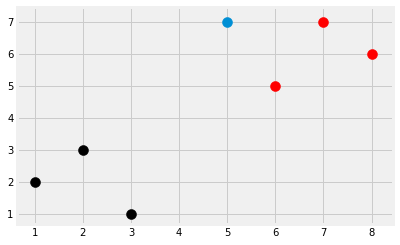

In [100]:
# Plot the dataset
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()


In [108]:
# Define a classification function
def k_nearest_neighbors(data, predict, k = 3):
    '''Given the training data (data) and test data (predict) 
    the function returns the prediction for a point'''
    if len(data) > k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    # Calculate distance between the prediction point and each of the poin in a data set
    distances = []
    for group in data:
        for item in data[group]:
            euclidean_dist = np.linalg.norm(np.array(item)-np.array(predict))
            distances.append([euclidean_dist, group])
    votes = [i[1] for i in sorted(distances)[:k]]       
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result


In [109]:
result = k_nearest_neighbors(dataset,new_features)
print(result)

r


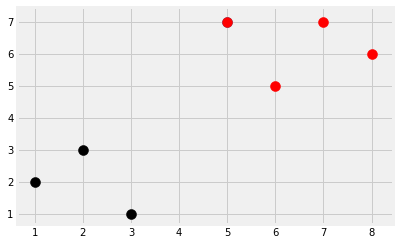

In [111]:
# Plot the dataset and classified prediction 
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

### Testing on a larger data set (breast cancer data)

Let's put together the necessary libraries and the user defined function:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
import random
style.use('fivethirtyeight')

# Define a classification function
def k_nearest_neighbors(data, predict, k = 3):
    '''Given the training data (data) and test data (predict) 
    the function returns the prediction for a point'''
    if len(data) > k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    # Calculate distance between the prediction point and each of the poin in a data set
    distances = []
    for group in data:
        for item in data[group]:
            euclidean_dist = np.linalg.norm(np.array(item)-np.array(predict))
            distances.append([euclidean_dist, group])
    votes = [i[1] for i in sorted(distances)[:k]]       
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result


Now, take the breast cancer data we loaded previously. Note that __"2" is for benign tumors; "4"  - for malignant tumors__


In [10]:
full_data = df.astype(float).values.tolist() # convert the entire dataframe to a float type and convert to the list of lists

In [13]:
full_data[:5]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

Now, we need to randomly split the set into training and test.


In [17]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[],4:[]} # create dictionaries that we later populate
test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]


In [18]:
len(full_data)

699

In [19]:
len(train_data)

560

In [21]:
len(test_data)

139

In [22]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [23]:
train_set

{2: [[4.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [8.0, 4.0, 4.0, 5.0, 4.0, 7.0, 7.0, 8.0, 2.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 9.0, 7.0, 5.0, 5.0, 8.0, 4.0, 2.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0],
  [1.0, 1.0, 4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0,

In [42]:
# Training and testing
correct = 0.0
total = 0.0
%time 
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set,data, k = 5)
        if group == vote:
            correct += 1
        total += 1
print("Accuracy: ", correct/total)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs
('Accuracy: ', 0.9856115107913669)


### kNN disadvantages:

1. There are two ways to measure confidence.
    1. How many examples you got correct vs incorrect in the testing stage;
    2. Checking the vote percentage. For example, your overall algorithm may be 97% accurate, but on some of the classifications the votes may have been 3 to 2. While 3 is the majority, it's only 60% vote rather than 100% which would be ideal. In terms of telling someone whether or not they have breast cancer, like the automatic car differentiating between a blob of tar and a child in a blanket, you probably prefer 100%! Thus, in the case of 60% vote on a 97% accurate classifier, you can be 97% sure that you are only 60% certain about your classification. 
2. Slow algorithm
3. Doesn't handle outliers and performs worse with any useless data (e.g. 'ID' column) 